In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Import Data

In [2]:
curr_httpget = pd.read_csv('curr_httpget.csv')
curr_httpgetmt = pd.read_csv('curr_httpgetmt.csv')
curr_httppost = pd.read_csv('curr_httppost.csv')
curr_httppostmt = pd.read_csv('curr_httppostmt.csv')
#curr_httpget6 = pd.read_csv('curr_httpget6.csv')
curr_httpgetmt6 = pd.read_csv('curr_httpgetmt6.csv')
#curr_httppost6 = pd.read_csv('curr_httppost6.csv')
curr_httppostmt6 = pd.read_csv('curr_httppostmt6.csv')

In [3]:
geo = pd.read_excel('Unit-Profile-sept2017.xlsx')
geo_down = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Download']]
geo_up = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Upload']]

In [4]:
# t-test, null: mean1 = mean2
from scipy import stats

def t_test(mean1, mean2, std1, std2, count1, count2):
    statistics = np.abs(mean1 - mean2) / np.sqrt(((count1 - 1) * (std1 ** 2) + (count2 - 1) * (std2 ** 2))
                                          * (1 / count1 + 1 / count2) / (count1 + count2 - 2))
    p = 1 - stats.t.cdf(statistics,df=count1+count2-2)
    
    return p

####  

### IPV4 vs IPV6 Download         metric: bytes_sec

In [5]:
# curr_httpgetmt and curr_httpgetmt6

getmt4 = curr_httpgetmt.loc[curr_httpgetmt['bytes_sec'] != 0,['unit_id', 'bytes_sec', 'threads']].groupby(['unit_id', 'threads']).mean()
getmt4.reset_index(['unit_id', 'threads'], inplace = True)
getmt4_merge = getmt4.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
getmt4_merge.head()

,unit_id,threads,bytes_sec,ISP,Technology,State,Census,Download
0,16,8,1.047664e+05,Frontier,DSL,CA,West,3
1,390,8,7.036725e+06,Verizon,Fiber,KY,South,50
2,396,8,6.319197e+06,CenturyLink,DSL,WA,West,40
3,414,8,8.766218e+06,Comcast,Cable,WA,West,75
4,422,8,1.416974e+07,Comcast,Cable,WA,West,100


In [6]:
len(getmt4)

5141

In [7]:
len(getmt4_merge)

3887

In [8]:
getmt6 = curr_httpgetmt6.loc[curr_httpgetmt6['bytes_sec'] != 0,['unit_id', 'bytes_sec', 'threads']].groupby(['unit_id', 'threads']).mean()
getmt6.reset_index(['unit_id', 'threads'], inplace = True)
getmt6_merge = getmt6.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
getmt6_merge.head()

,unit_id,threads,bytes_sec,ISP,Technology,State,Census,Download
0,5436,8,1.217921e+07,Charter,Cable,NH,Northeast,100
1,5820,8,9.736093e+06,Mediacom,Cable,MO,Midwest,60
2,8352,8,1.272593e+07,Charter,Cable,WI,Midwest,60
3,9195,8,1.423058e+07,Comcast,Cable,MI,Midwest,75
4,11485,8,1.454479e+07,Comcast,Cable,NH,Northeast,100


In [9]:
len(getmt6)

937

In [10]:
len(getmt6_merge)

719

In [14]:
getmt_bynode = getmt4_merge.merge(getmt6_merge, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
getmt_bynode = getmt_bynode[['unit_id', 'threads_x', 'ISP_x', 'Technology_x', 'State_x', 'Census_x', 'Download_x', 'bytes_sec_x', 'bytes_sec_y']]
getmt_bynode.columns = ['unit_id', 'threads', 'ISP', 'Technology', 'State', 'Census', 'Download', 'bytes_sec_4', 'bytes_sec_6']
getmt_bynode.ISP = getmt_bynode.ISP.astype(str)
getmt_bynode.Technology = getmt_bynode.Technology.astype(str)
getmt_bynode.State = getmt_bynode.State.astype(str)
getmt_bynode.Census = getmt_bynode.Census.astype(str)
getmt_bynode.Download = getmt_bynode.Download.astype(float)
getmt_bynode['IPV4_Usage'] = getmt_bynode['bytes_sec_4'] / (getmt_bynode['Download'] * 125000)
getmt_bynode['IPV6_Usage'] = getmt_bynode['bytes_sec_6'] / (getmt_bynode['Download'] * 125000)
getmt_bynode['Difference_Usage'] = round(getmt_bynode['IPV4_Usage'] - getmt_bynode['IPV6_Usage'],3)
getmt_bynode.drop(['bytes_sec_4', 'bytes_sec_6'], axis = 1, inplace = True)
getmt_bynode.head()

,unit_id,threads,ISP,Technology,State,Census,Download,IPV4_Usage,IPV6_Usage,Difference_Usage
0,5436,8,Charter,Cable,NH,Northeast,100.0,0.956308,0.974337,-0.018
1,5820,8,Mediacom,Cable,MO,Midwest,60.0,1.326836,1.298146,0.029
2,8352,8,Charter,Cable,WI,Midwest,60.0,1.349426,1.696790,-0.347
3,9195,8,Comcast,Cable,MI,Midwest,75.0,1.410508,1.517928,-0.107
4,11485,8,Comcast,Cable,NH,Northeast,100.0,1.156070,1.163584,-0.008


In [13]:
len(getmt_bynode)

719

In [20]:
getmt_group = getmt_bynode[['Technology', 'Download', 'threads', 'IPV4_Usage', 'IPV6_Usage', 'Difference_Usage']]\
                    .groupby(['Technology', 'Download', 'threads'])\
                    .agg(['count', 'mean', 'std'])
getmt_group.reset_index(['Technology', 'Download', 'threads'], inplace = True)
getmt_group.columns = ['Technology', 'Download', 'threads', 'IPV4_Usage_count', 'IPV4_Usage_mean', 'IPV4_Usage_std',\
                            'IPV6_Usage_count', 'IPV6_Usage_mean', 'IPV6_Usage_std', \
                            'Difference_count', 'Difference_mean', 'Difference_std']
getmt_group = getmt_group.loc[getmt_group['IPV4_Usage_std'].notnull()]
getmt_group.reset_index(drop = True, inplace = True)
getmt_group.drop(['Difference_count', 'Difference_std'], axis = 1, inplace = True)
getmt_group['Difference_mean'] = round(getmt_group['Difference_mean'], 3)
getmt_group

,Technology,Download,threads,IPV4_Usage_count,IPV4_Usage_mean,IPV4_Usage_std,IPV6_Usage_count,IPV6_Usage_mean,IPV6_Usage_std,Difference_mean
0,Cable,20.0,8,3,1.151159,0.030385,3,1.156885,0.033304,-0.006
1,Cable,25.0,8,10,1.882896,1.004827,10,1.882441,1.012139,0.000
2,Cable,30.0,8,4,1.103803,0.141290,4,1.103886,0.127532,-0.000
3,Cable,50.0,8,33,1.220611,0.221852,33,1.193152,0.275858,0.027
4,Cable,60.0,8,48,1.166106,0.244146,48,1.115810,0.340157,0.050
5,Cable,75.0,8,33,1.238059,0.339731,33,1.194218,0.346393,0.044
6,Cable,100.0,8,91,1.318080,0.682092,91,1.295741,0.709653,0.022
7,Cable,105.0,8,5,1.186820,0.316726,5,1.204551,0.265723,-0.018
8,Cable,150.0,8,24,1.085598,0.355540,24,1.034880,0.282191,0.051
9,Cable,200.0,8,78,1.106494,0.197781,78,1.025920,0.311281,0.081


In [22]:
getmt_group['p_value'] = getmt_group.apply(lambda row: t_test(row.IPV4_Usage_mean, row.IPV6_Usage_mean, \
                                                    row.IPV4_Usage_std, row.IPV6_Usage_std, \
                                                    row.IPV4_Usage_count, row.IPV6_Usage_count), axis=1)
getmt_group['if_vary'] = getmt_group.apply(lambda row: row.p_value < 0.05, axis=1)
getmt_group[['Technology', 'Download', 'IPV4_Usage_mean', 'IPV6_Usage_mean', 'if_vary', 'Difference_mean']]

,Technology,Download,IPV4_Usage_mean,IPV6_Usage_mean,if_vary,Difference_mean
0,Cable,20.0,1.151159,1.156885,False,-0.006
1,Cable,25.0,1.882896,1.882441,False,0.000
2,Cable,30.0,1.103803,1.103886,False,-0.000
3,Cable,50.0,1.220611,1.193152,False,0.027
4,Cable,60.0,1.166106,1.115810,False,0.050
5,Cable,75.0,1.238059,1.194218,False,0.044
6,Cable,100.0,1.318080,1.295741,False,0.022
7,Cable,105.0,1.186820,1.204551,False,-0.018
8,Cable,150.0,1.085598,1.034880,False,0.051
9,Cable,200.0,1.106494,1.025920,True,0.081


#### Conclusion: If we would like to distinguish IPV4 and IPV6 through byte/sec, they are almost identical.

####  

### IPV4 vs IPV6 Download metric: Availability

In [23]:
getmt4_ava = curr_httpgetmt[['unit_id', 'successes', 'failures', 'threads']].groupby(['unit_id', 'threads']).sum()
getmt4_ava['Availability'] = getmt4_ava['successes'] / (getmt4_ava['successes'] + getmt4_ava['failures'])
getmt4_ava.reset_index(['unit_id', 'threads'], inplace = True)
getmt4_ava = getmt4_ava[['unit_id', 'threads', 'Availability']]
getmt4_ava.head()

,unit_id,threads,Availability
0,16,8,0.991031
1,373,8,1.000000
2,380,8,1.000000
3,382,8,0.980000
4,390,8,0.993478


In [24]:
len(getmt4_ava)

5144

In [25]:
getmt6_ava = curr_httpgetmt6[['unit_id', 'successes', 'failures', 'threads']].groupby(['unit_id', 'threads']).sum()
getmt6_ava['Availability'] = getmt6_ava['successes'] / (getmt6_ava['successes'] + getmt6_ava['failures'])
getmt6_ava.reset_index(['unit_id', 'threads'], inplace = True)
getmt6_ava = getmt6_ava[['unit_id', 'threads', 'Availability']]
getmt6_ava.head()

,unit_id,threads,Availability
0,723,8,0.0
1,823,8,0.0
2,1023,8,0.0
3,1165,8,0.0
4,5308,8,0.0


In [26]:
len(getmt6_ava)

1055

In [31]:
getmt_ava_bynode = getmt4_ava.merge(getmt6_ava, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
getmt_ava_bynode.drop('threads_y', axis = 1, inplace = True)
getmt_ava_bynode.columns = ['unit_id', 'threads', 'Availability_IPV4', 'Availability_IPV6']
getmt_ava_bynode = getmt_ava_bynode.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
getmt_ava_bynode['Availability_Difference'] = round(getmt_ava_bynode['Availability_IPV4'] - \
                                                    getmt_ava_bynode['Availability_IPV6'], 4)
getmt_ava_bynode.head()

,unit_id,threads,Availability_IPV4,Availability_IPV6,ISP,Technology,State,Census,Download,Availability_Difference
0,823,8,1.000000,0.0,CenturyLink,DSL,WA,West,12,1.0000
1,1023,8,1.000000,0.0,Charter,Cable,OH,Midwest,100,1.0000
2,1165,8,0.997849,0.0,Verizon,Fiber,VA,South,75,0.9978
3,5308,8,1.000000,0.0,Comcast,Cable,IL,Midwest,75,1.0000
4,5321,8,1.000000,0.0,Charter,Cable,NC,South,20,1.0000


In [32]:
len(getmt_ava_bynode)

797

In [34]:
getmt_ava_group = getmt_ava_bynode[['Technology', 'Download', 'threads', 'Availability_IPV4', 'Availability_IPV6', 'Availability_Difference']]\
                    .groupby(['Technology', 'Download', 'threads'])\
                    .agg(['count', 'mean', 'std'])
getmt_ava_group.reset_index(['Technology', 'Download', 'threads'], inplace = True)
getmt_ava_group.columns = ['Technology', 'Download', 'threads', 'Availability_4_count', 'Availability_4_mean', 'Availability_4_std',\
                            'Availability_6_count', 'Availability_6_mean', 'Availability_6_std', \
                        'Availability_Difference_count', 'Availability_Difference', 'Availability_Difference_std']
getmt_ava_group = getmt_ava_group.loc[getmt_ava_group['Availability_4_std'].notnull()]
getmt_ava_group.reset_index(drop = True, inplace = True)
getmt_ava_group.drop(['Availability_Difference_count', 'Availability_Difference_std'], axis = 1, inplace = True)
getmt_ava_group['Availability_Difference'] = round(getmt_ava_group['Availability_Difference'], 3)
getmt_ava_group

,Technology,Download,threads,Availability_4_count,Availability_4_mean,Availability_4_std,Availability_6_count,Availability_6_mean,Availability_6_std,Availability_Difference
0,Cable,20.0,8,6,0.993108,0.011716,6,0.490799,0.537697,0.502
1,Cable,25.0,8,11,0.989920,0.014171,11,0.893951,0.297707,0.096
2,Cable,30.0,8,8,0.996586,0.005847,8,0.494594,0.528837,0.502
3,Cable,50.0,8,37,0.991041,0.020342,37,0.814023,0.349211,0.177
4,Cable,60.0,8,60,0.957138,0.161092,60,0.695411,0.409836,0.262
5,Cable,75.0,8,40,0.987564,0.051859,40,0.782595,0.381716,0.205
6,Cable,100.0,8,103,0.992580,0.017360,103,0.810992,0.339731,0.182
7,Cable,101.0,8,2,1.000000,0.000000,2,0.500000,0.707107,0.500
8,Cable,105.0,8,6,0.989868,0.013874,6,0.789505,0.393620,0.200
9,Cable,150.0,8,26,0.995837,0.009654,26,0.870420,0.317025,0.125


In [36]:
getmt_ava_group['p_value'] = getmt_ava_group.apply(lambda row: t_test(row.Availability_4_mean, row.Availability_6_mean, \
                                                    row.Availability_4_std, row.Availability_6_std, \
                                                    row.Availability_4_count, row.Availability_6_count), axis=1)
getmt_ava_group['if_vary'] = getmt_ava_group.apply(lambda row: row.p_value < 0.05, axis=1)
getmt_ava_difference = getmt_ava_group[['Technology', 'Download', 'Availability_4_mean', 'Availability_6_mean', \
                                        'if_vary', 'Availability_Difference']]
getmt_ava_difference

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
0,Cable,20.0,0.993108,0.490799,True,0.502
1,Cable,25.0,0.989920,0.893951,False,0.096
2,Cable,30.0,0.996586,0.494594,True,0.502
3,Cable,50.0,0.991041,0.814023,True,0.177
4,Cable,60.0,0.957138,0.695411,True,0.262
5,Cable,75.0,0.987564,0.782595,True,0.205
6,Cable,100.0,0.992580,0.810992,True,0.182
7,Cable,101.0,1.000000,0.500000,False,0.500
8,Cable,105.0,0.989868,0.789505,False,0.200
9,Cable,150.0,0.995837,0.870420,True,0.125


### Explore the difference by tech

#### DSL

In [39]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == True) & \
                         (getmt_ava_difference['Technology'] == 'DSL')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
16,DSL,10.0,0.995534,0.000000,True,0.996
12,DSL,1.5,0.990397,0.000000,True,0.990
13,DSL,3.0,0.992460,0.177083,True,0.815


In [40]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == False) & \
                         (getmt_ava_difference['Technology'] == 'DSL')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
17,DSL,12.0,0.987450,0.573913,False,0.414
18,DSL,20.0,0.994501,0.595604,False,0.399
15,DSL,7.0,0.998920,0.903226,False,0.096
14,DSL,6.0,0.963273,0.964286,False,-0.001
19,DSL,40.0,0.998925,1.000000,False,-0.001


#### It seems that when DSL, we could find a boundary between 0.414 and 0.815.

####   

#### Cable

In [41]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == True) & \
                         (getmt_ava_difference['Technology'] == 'Cable')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
0,Cable,20.0,0.993108,0.490799,True,0.502
2,Cable,30.0,0.996586,0.494594,True,0.502
4,Cable,60.0,0.957138,0.695411,True,0.262
5,Cable,75.0,0.987564,0.782595,True,0.205
6,Cable,100.0,0.992580,0.810992,True,0.182
3,Cable,50.0,0.991041,0.814023,True,0.177
9,Cable,150.0,0.995837,0.870420,True,0.125
10,Cable,200.0,0.988515,0.907445,True,0.081


In [42]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == False) & \
                         (getmt_ava_difference['Technology'] == 'Cable')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
7,Cable,101.0,1.000000,0.500000,False,0.500
8,Cable,105.0,0.989868,0.789505,False,0.200
1,Cable,25.0,0.989920,0.893951,False,0.096
11,Cable,300.0,0.988272,0.987972,False,0.000


#### No obvious boundary

####    

#### IPBB

In [43]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == True) & \
                         (getmt_ava_difference['Technology'] == 'IPBB')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
30,IPBB,24.0,0.991966,0.846975,True,0.145
28,IPBB,12.0,0.989821,0.851001,True,0.139
24,IPBB,3.0,0.988286,0.890285,True,0.098
26,IPBB,6.0,0.991319,0.912341,True,0.079
29,IPBB,18.0,0.995218,0.923738,True,0.071
31,IPBB,45.0,0.993936,0.930176,True,0.064


In [44]:
getmt_ava_difference.loc[(getmt_ava_difference['if_vary'] == False) & \
                         (getmt_ava_difference['Technology'] == 'IPBB')]\
                        .sort_values('Availability_Difference', ascending = False)

,Technology,Download,Availability_4_mean,Availability_6_mean,if_vary,Availability_Difference
23,IPBB,1.5,0.983379,0.951809,False,0.032
25,IPBB,5.0,0.988710,0.994624,False,-0.006
27,IPBB,10.0,0.988095,1.000000,False,-0.012


#### Seems a boundary between 0.032 and 0.064

##  

### IPV4 Download among Geography metric: bytes_sec

##### by state

In [27]:
getmt4_merge.head()

,unit_id,threads,bytes_sec,ISP,Technology,State,Census,Download
0,16,8,1.047664e+05,Frontier,DSL,CA,West,3
1,390,8,7.036725e+06,Verizon,Fiber,KY,South,50
2,396,8,6.319197e+06,CenturyLink,DSL,WA,West,40
3,414,8,8.766218e+06,Comcast,Cable,WA,West,75
4,422,8,1.416974e+07,Comcast,Cable,WA,West,100


In [28]:
getmt4_state = getmt4_merge.loc[getmt4_merge['threads'] == 8, ['Technology', 'Download', 'State', 'bytes_sec']]
getmt4_state['State'] = getmt4_state.apply(lambda row: row.State.upper(), axis=1)
getmt4_state['Download'].unique()

array([3, 50, 40, 75, 100, 60, 150, 18, 24, 12, 20, 25, 6, 30, 105, 101,
       1.5, 45, 10, 4, 70, 7, 5, '[1.1 - 3.0]', 8, 16, '[0.5 - 1.0]', 15,
       200, 1, 35, 300, 11, 120, 250], dtype=object)

In [29]:
mask = (getmt4_state['Download'] != '[1.1 - 3.0]') & (getmt4_state['Download'] != '[0.5 - 1.0]')
getmt4_state = getmt4_state.loc[mask]
getmt4_state['Download'].unique()

array([3, 50, 40, 75, 100, 60, 150, 18, 24, 12, 20, 25, 6, 30, 105, 101,
       1.5, 45, 10, 4, 70, 7, 5, 8, 16, 15, 200, 1, 35, 300, 11, 120, 250],
      dtype=object)

In [30]:
getmt4_state['Download'] = getmt4_state['Download'].astype(float)
getmt4_state = getmt4_state.groupby(['Technology', 'Download', 'State']).agg(['count', 'mean'])
getmt4_state.reset_index(['Technology', 'Download', 'State'], inplace = True)
getmt4_state.columns = ['Technology', 'Download', 'State', 'count', 'mean']
# calculate the percentage of usage
getmt4_state['Percentage of Usage'] = getmt4_state['mean'] / (getmt4_state['Download'] * 125000)
getmt4_state.drop('mean', axis = 1, inplace = True)
# eliminate the unreasonable value (more than 2 times of download)
getmt4_state = getmt4_state.loc[(getmt4_state['Percentage of Usage'] < 2)]
getmt4_state.reset_index(drop = True, inplace = True)
getmt4_state

,Technology,Download,State,count,Percentage of Usage
0,Cable,15.0,NJ,1,1.169800
1,Cable,20.0,AZ,1,1.190440
2,Cable,20.0,FL,2,1.167627
3,Cable,20.0,HI,1,1.124241
4,Cable,20.0,IN,1,1.172749
5,Cable,20.0,MA,1,1.169727
6,Cable,20.0,ME,2,1.193588
7,Cable,20.0,MN,1,1.170042
8,Cable,20.0,MO,1,1.168048
9,Cable,20.0,NY,21,1.222031


In [31]:
# select (Tech, Download) group that has more than 10 states
select_group = getmt4_state[['Technology', 'Download', 'State']].groupby(['Technology', 'Download'])\
                    .agg(['count'])
select_group.reset_index(['Technology', 'Download'], inplace = True)
select_group.columns = ['Technology', 'Download', 'count']
select_group = select_group.loc[select_group['count'] > 10]
select_group.reset_index(drop = True, inplace = True)
select_group

,Technology,Download,count
0,Cable,20.0,14
1,Cable,25.0,13
2,Cable,30.0,16
3,Cable,50.0,29
4,Cable,60.0,40
5,Cable,75.0,22
6,Cable,100.0,39
7,Cable,105.0,16
8,Cable,150.0,21
9,Cable,200.0,25


/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


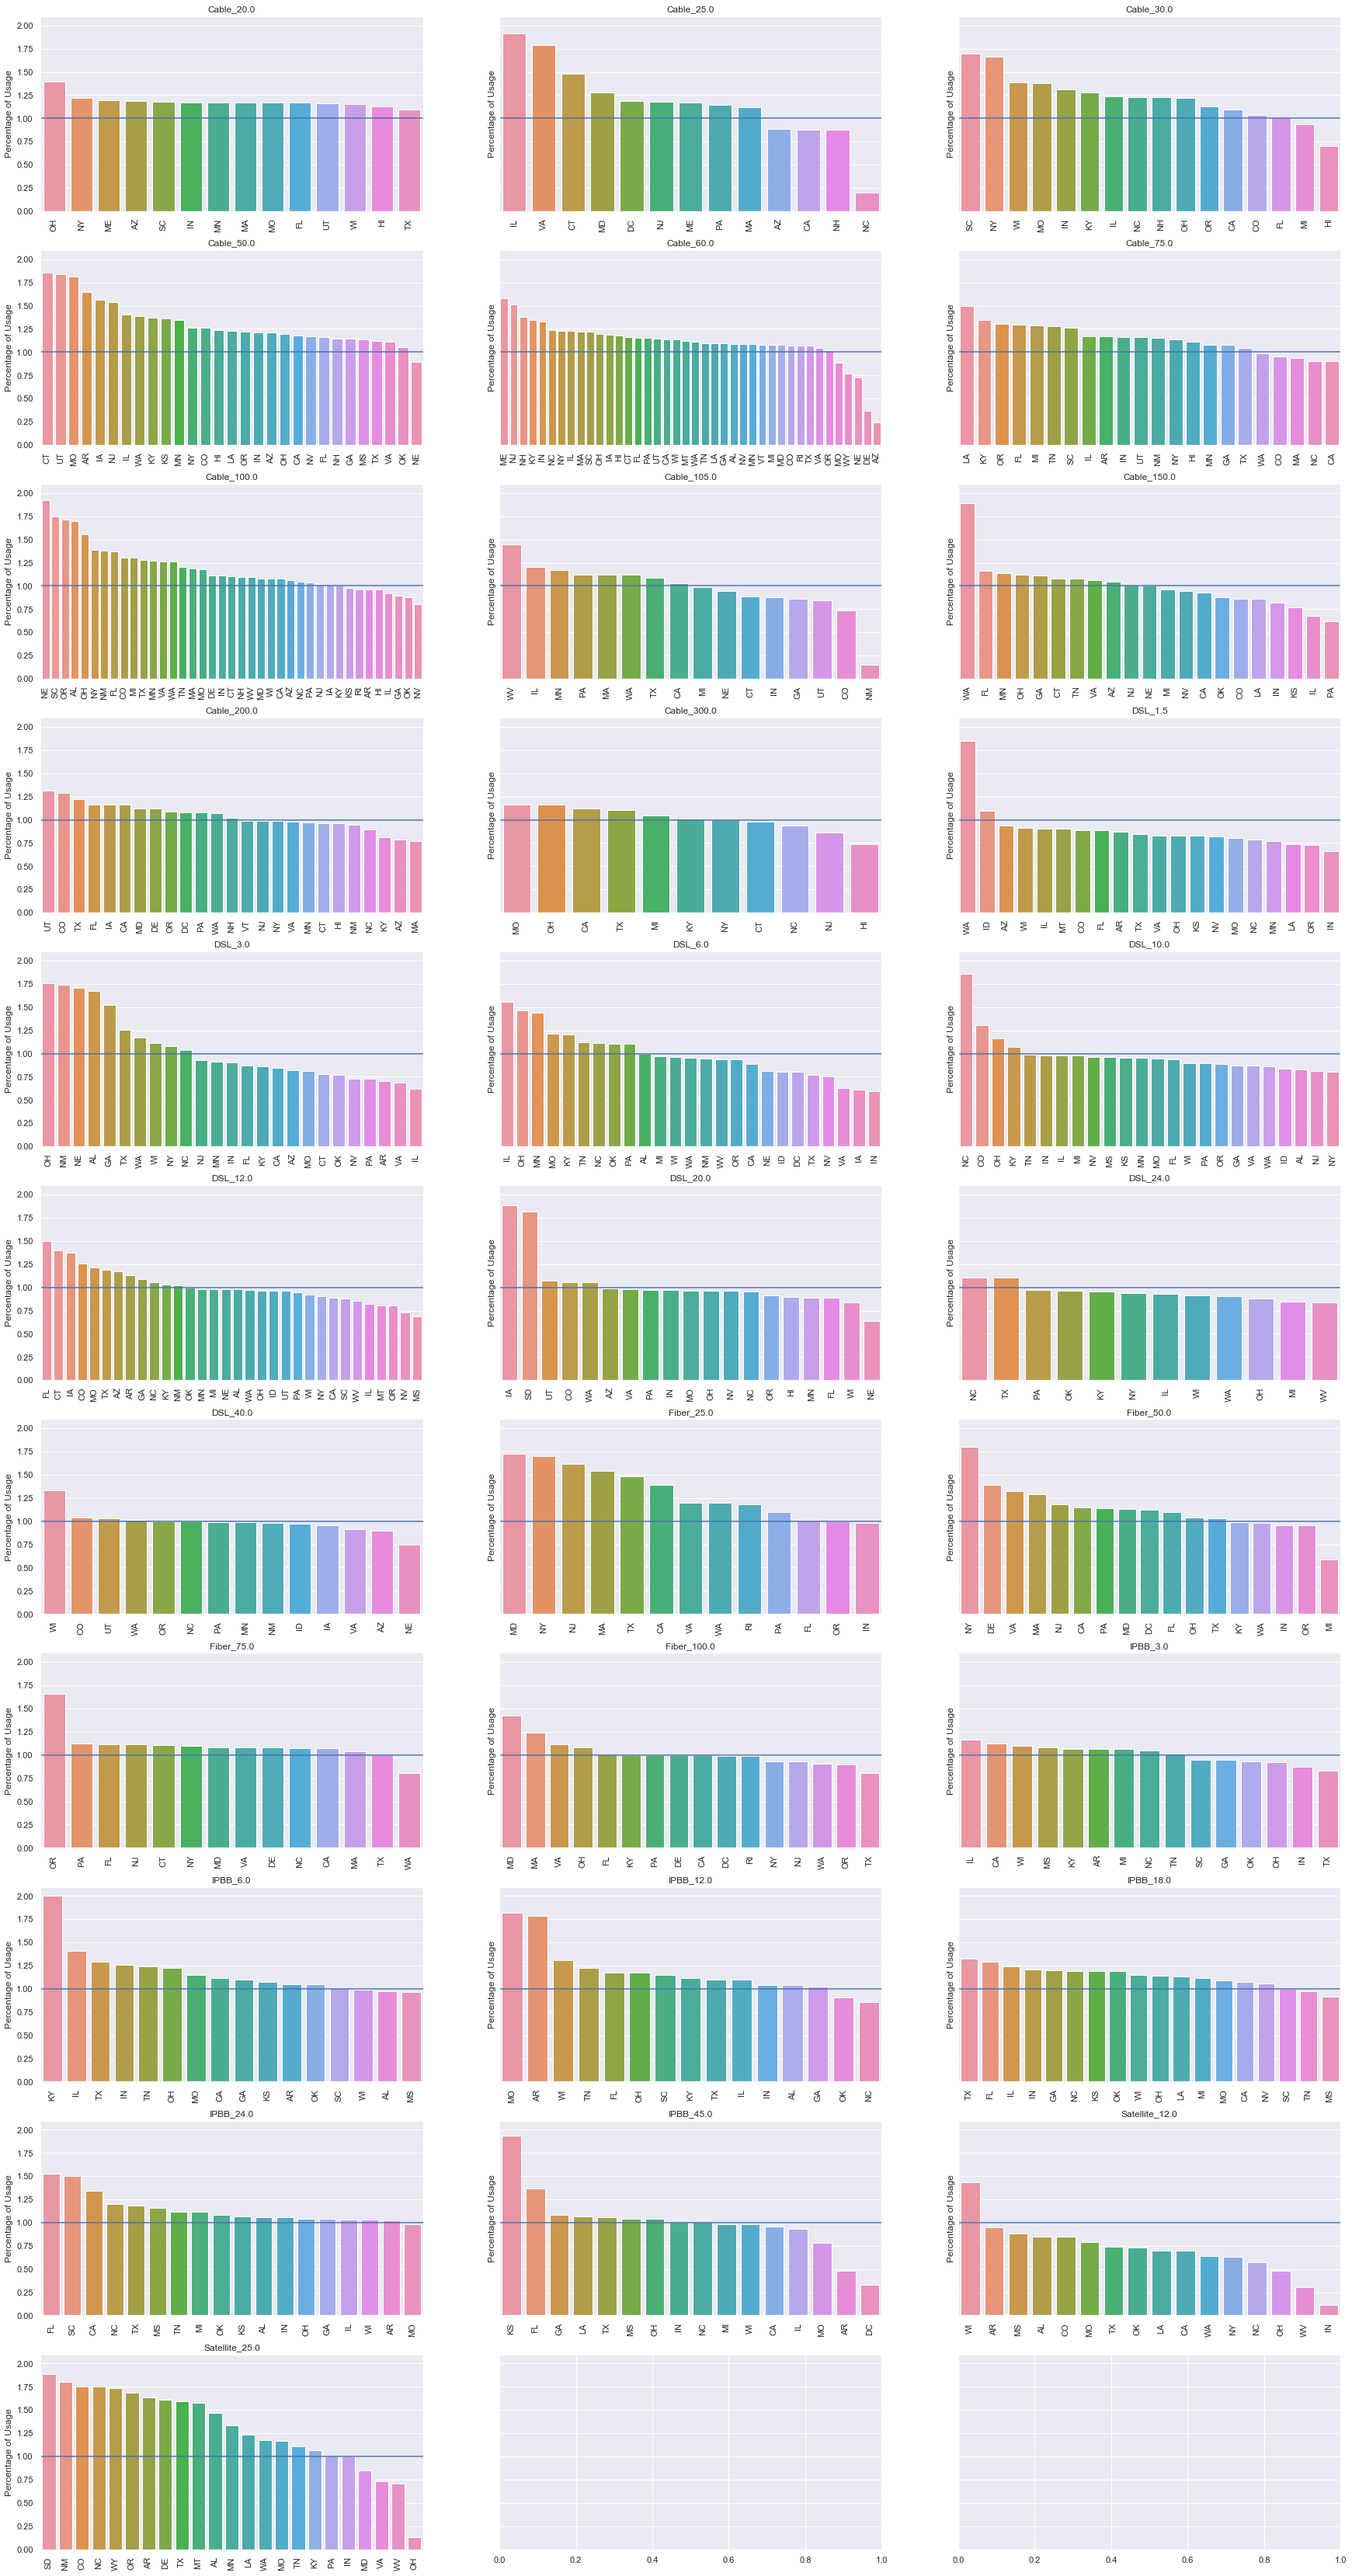

In [32]:
fig, ax = plt.subplots(11, 3, sharey = True, figsize=(30,60))

for i in range(len(select_group)):
    subset = getmt4_state.loc[(getmt4_state['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_state['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Percentage of Usage'], ascending = False, inplace = True)
    _ = sns.barplot(x='State',y='Percentage of Usage', data=subset, ax=ax[int(i/3)][i % 3])
    _ = ax[int(i/3)][i % 3].axhline(1, ls='-')
    _ = ax[int(i/3)][i % 3].set_xticklabels(ax[int(i/3)][i % 3].get_xticklabels(),rotation=90)
    _ = ax[int(i/3)][i % 3].set_title('{}_{}'.format(select_group.loc[i, 'Technology'], select_group.loc[i, 'Download']))
    _ = ax[int(i/3)][i % 3].set_ylabel('Percentage of Usage')
    _ = ax[int(i/3)][i % 3].set_xlabel('')

##### by census

In [46]:
getmt4_census = getmt4_merge.loc[getmt4_merge['threads'] == 8, ['Technology', 'Download','Census', 'bytes_sec']]
getmt4_census['Census'] = getmt4_census.apply(lambda row: row.Census.upper(), axis=1)
# eliminate some download
mask = (getmt4_census['Download'] != '[1.1 - 3.0]') & (getmt4_census['Download'] != '[0.5 - 1.0]')
getmt4_census = getmt4_census.loc[mask]

# download to float type
getmt4_census['Download'] = getmt4_census['Download'].astype(float)

getmt4_census = getmt4_census.groupby(['Technology', 'Download', 'Census']).agg(['count', 'mean'])
getmt4_census.reset_index(['Technology', 'Download', 'Census'], inplace = True)
getmt4_census.columns = ['Technology', 'Download', 'Census', 'count', 'mean']
# calculate the percentage of usage
getmt4_census['Percentage of Usage'] = getmt4_census['mean'] / (getmt4_census['Download'] * 125000)
getmt4_census.drop('mean', axis = 1, inplace = True)
# eliminate the unreasonable value (more than 2 times of download)
getmt4_census = getmt4_census.loc[getmt4_census['Percentage of Usage'] < 2]
getmt4_census.reset_index(drop = True, inplace = True)
getmt4_census

,Technology,Download,Census,count,Percentage of Usage
0,Cable,15.0,NORTHEAST,1,1.169800
1,Cable,20.0,MIDWEST,24,1.452808
2,Cable,20.0,NORTHEAST,25,1.303459
3,Cable,20.0,SOUTH,12,1.332623
4,Cable,25.0,NORTHEAST,29,1.260474
5,Cable,30.0,MIDWEST,18,1.365603
6,Cable,30.0,NORTHEAST,9,1.826062
7,Cable,30.0,SOUTH,12,1.497951
8,Cable,30.0,WEST,4,0.990318
9,Cable,35.0,NORTHEAST,1,0.983210


In [47]:
getmt4_census['Census'].unique()

array(['NORTHEAST', 'MIDWEST', 'SOUTH', 'WEST'], dtype=object)

In [48]:
select_group = getmt4_census[['Technology', 'Download', 'Census']].groupby(['Technology', 'Download'])\
                    .agg(['count'])
select_group.reset_index(['Technology', 'Download'], inplace = True)
select_group.columns = ['Technology', 'Download', 'count']
select_group = select_group.loc[select_group['count'] >= 3]
select_group.reset_index(drop = True, inplace = True)
select_group

,Technology,Download,count
0,Cable,20.0,3
1,Cable,30.0,4
2,Cable,50.0,4
3,Cable,60.0,4
4,Cable,75.0,4
5,Cable,100.0,4
6,Cable,105.0,4
7,Cable,150.0,4
8,Cable,200.0,4
9,Cable,300.0,4


/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7:

/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


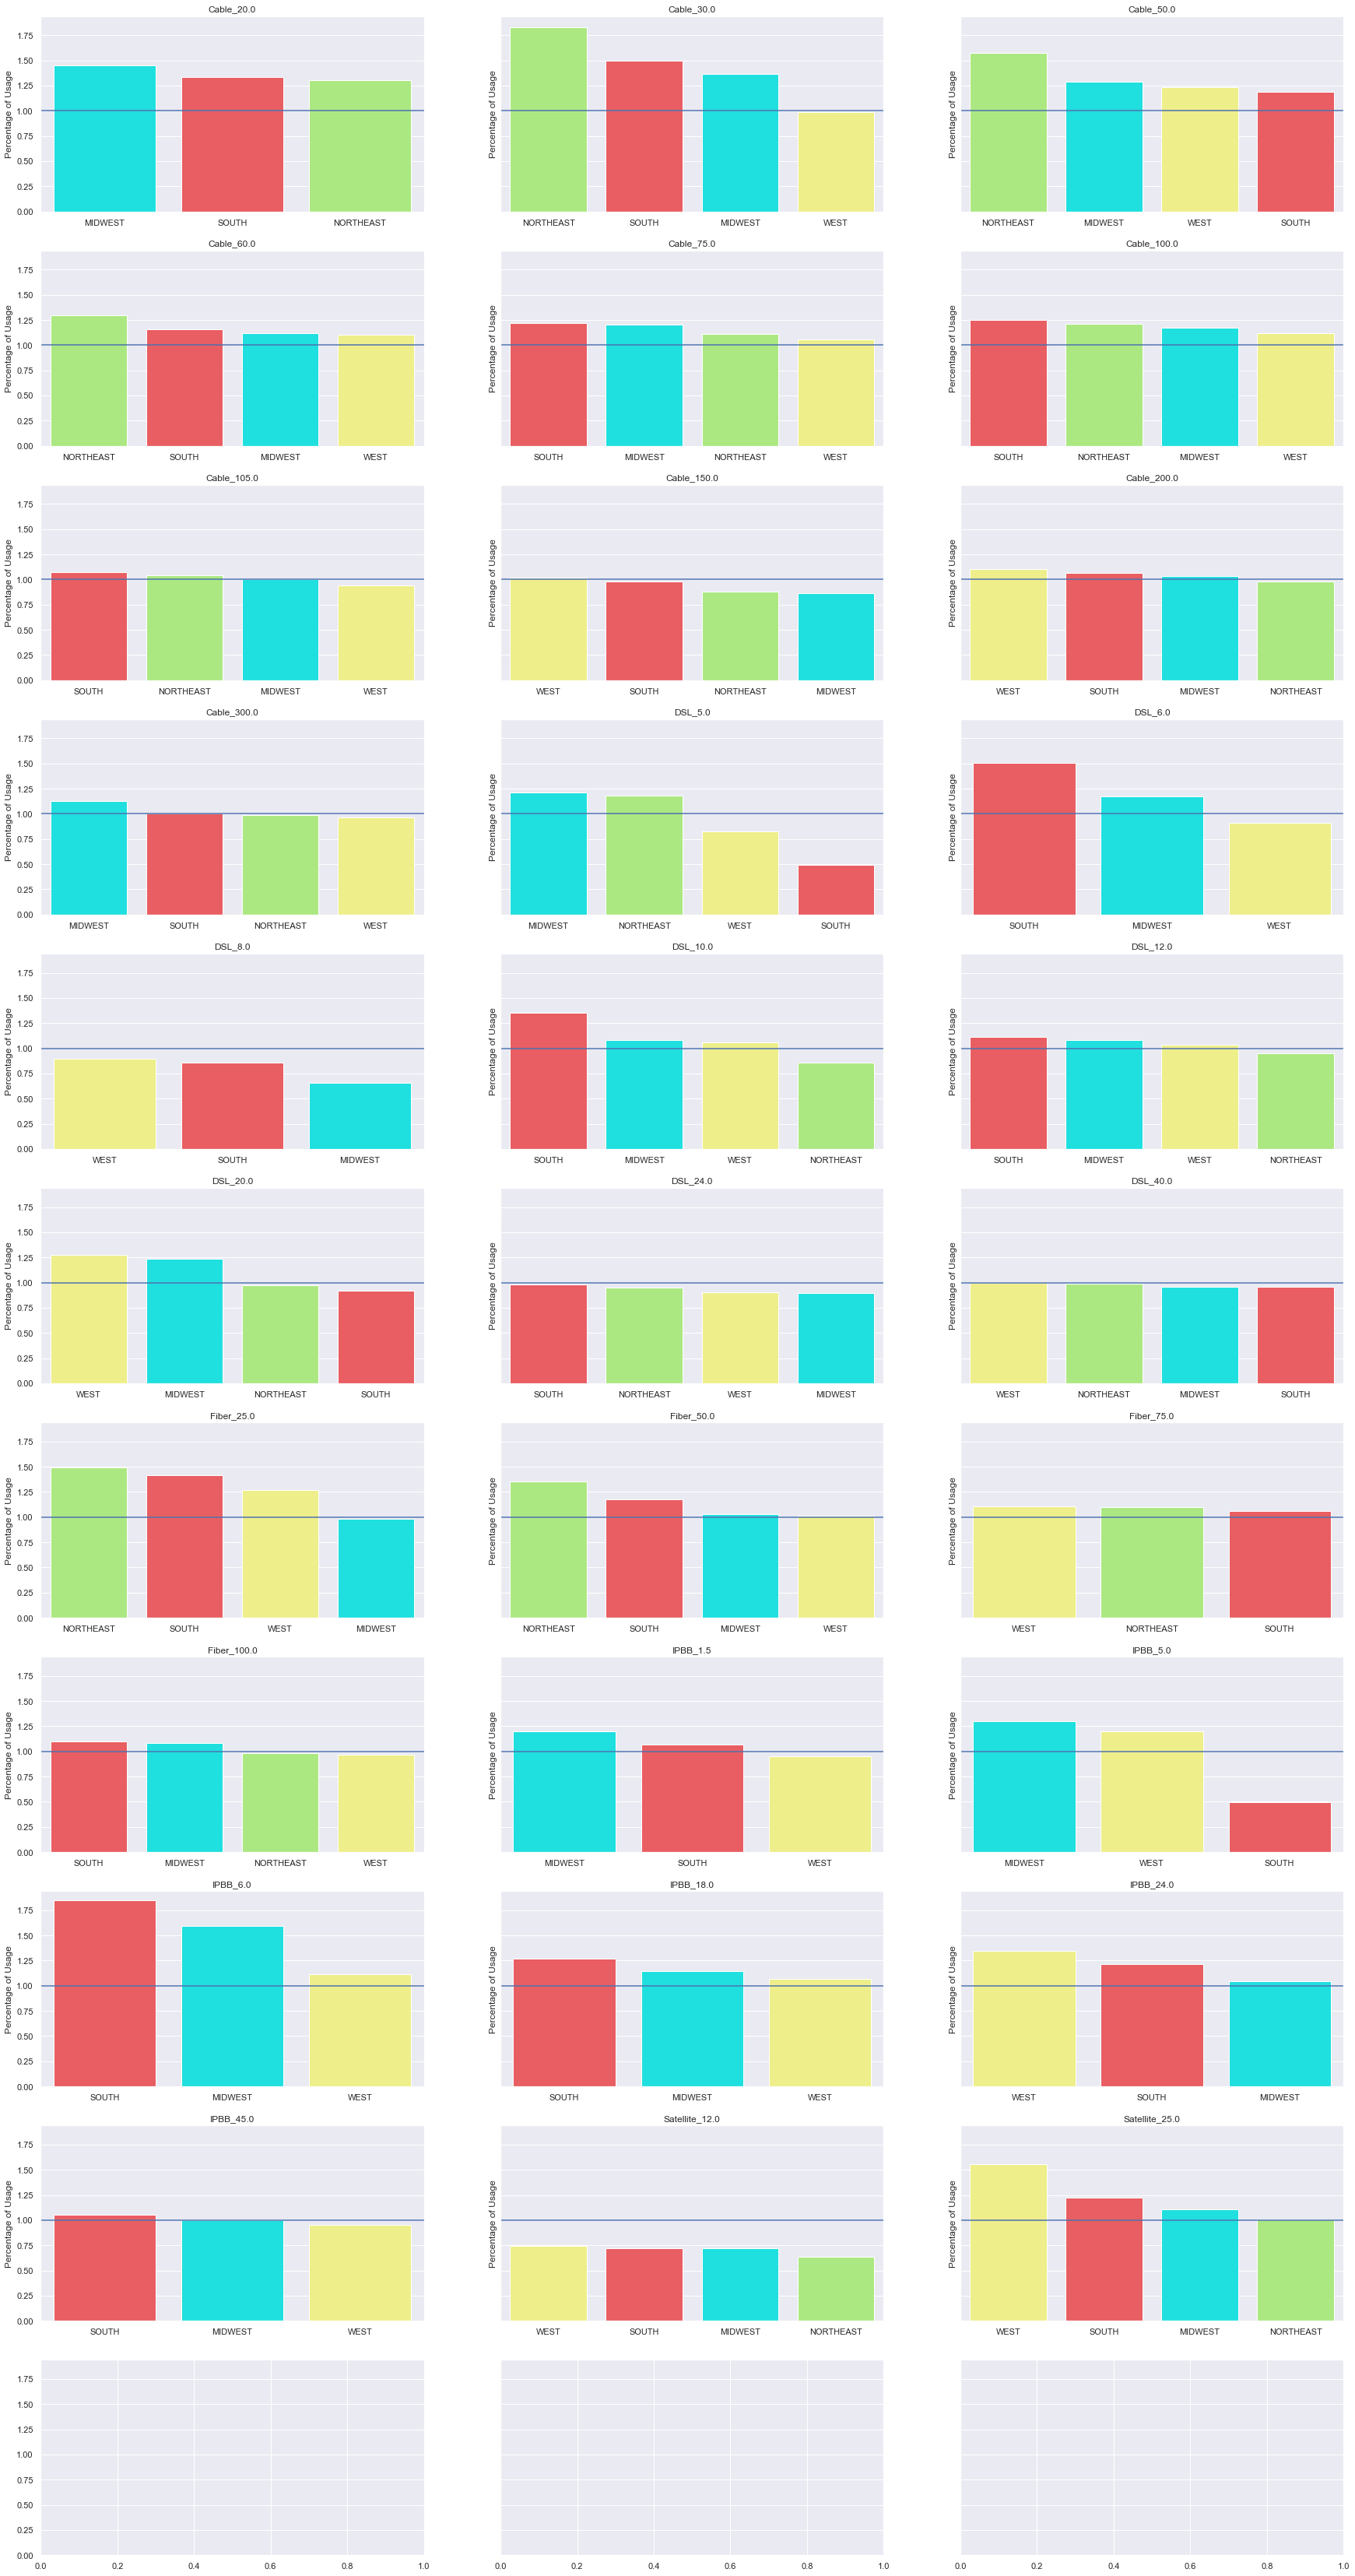

In [49]:
fig, ax = plt.subplots(int(len(select_group) / 3) + 1, 3, sharey = True, figsize=(30,60))
palette ={'NORTHEAST':'#a9f971','MIDWEST':'#00ffff', 'SOUTH':'#ff474c', 'WEST':'#fffe7a'}

for i in range(len(select_group)):
    subset = getmt4_census.loc[(getmt4_census['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_census['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Percentage of Usage'], ascending = False, inplace = True)
    _ = sns.barplot(x='Census',y='Percentage of Usage', palette=palette, \
                    data=subset, ax=ax[int(i/3)][i % 3])
    _ = ax[int(i/3)][i % 3].axhline(1, ls='-')
    _ = ax[int(i/3)][i % 3].set_title('{}_{}'.format(select_group.loc[i, 'Technology'], select_group.loc[i, 'Download']))
    _ = ax[int(i/3)][i % 3].set_ylabel('Percentage of Usage')
    _ = ax[int(i/3)][i % 3].set_xlabel('')

### IPV4 Download among Geography metric: Availability

#### by state

In [99]:
getmt_ava_bynode.head()

,unit_id,threads,Availability_IPV4,Availability_IPV6,ISP,Technology,State,Census,Download,Availability_Difference
0,823,8,1.000000,0.0,CenturyLink,DSL,WA,West,12,1.0000
1,1023,8,1.000000,0.0,Charter,Cable,OH,Midwest,100,1.0000
2,1165,8,0.997849,0.0,Verizon,Fiber,VA,South,75,0.9978
3,5308,8,1.000000,0.0,Comcast,Cable,IL,Midwest,75,1.0000
4,5321,8,1.000000,0.0,Charter,Cable,NC,South,20,1.0000


In [100]:
getmt4_ava_state = getmt_ava_bynode.loc[getmt_ava_bynode['threads'] == 8, ['Technology', 'Download', 'State', 'Availability_IPV4']]
getmt4_ava_state['State'] = getmt4_ava_state.apply(lambda row: row.State.upper(), axis=1)
getmt4_ava_state['Download'] = getmt4_ava_state['Download'].astype(float)
getmt4_ava_state = getmt4_ava_state.groupby(['Technology', 'Download', 'State']).agg(['count', 'mean'])
getmt4_ava_state.reset_index(['Technology', 'Download', 'State'], inplace = True)
getmt4_ava_state.columns = ['Technology', 'Download', 'State', 'count', 'Availability']
getmt4_ava_state.reset_index(drop = True, inplace = True)
getmt4_ava_state['Failure'] = 1 - getmt4_ava_state['Availability']
getmt4_ava_state

,Technology,Download,State,count,Availability,Failure
0,Cable,20.0,NC,1,1.000000,0.000000
1,Cable,20.0,NY,1,0.969697,0.030303
2,Cable,20.0,OH,1,1.000000,0.000000
3,Cable,20.0,PA,1,0.997653,0.002347
4,Cable,20.0,SC,1,0.997849,0.002151
5,Cable,20.0,WI,1,0.993450,0.006550
6,Cable,25.0,GA,1,0.997854,0.002146
7,Cable,25.0,IN,1,1.000000,0.000000
8,Cable,25.0,MA,5,0.980850,0.019150
9,Cable,25.0,PA,1,0.987013,0.012987


In [101]:
# select (Tech, Download) group that has more than 10 states
select_group = getmt4_ava_state[['Technology', 'Download', 'State']].groupby(['Technology', 'Download'])\
                    .agg(['count'])
select_group.reset_index(['Technology', 'Download'], inplace = True)
select_group.columns = ['Technology', 'Download', 'count']
select_group = select_group.loc[select_group['count'] > 10]
select_group.reset_index(drop = True, inplace = True)
select_group

,Technology,Download,count
0,Cable,50.0,17
1,Cable,60.0,22
2,Cable,75.0,14
3,Cable,100.0,27
4,Cable,150.0,14
5,Cable,200.0,23
6,IPBB,3.0,14
7,IPBB,6.0,18
8,IPBB,12.0,18
9,IPBB,18.0,18


/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A va

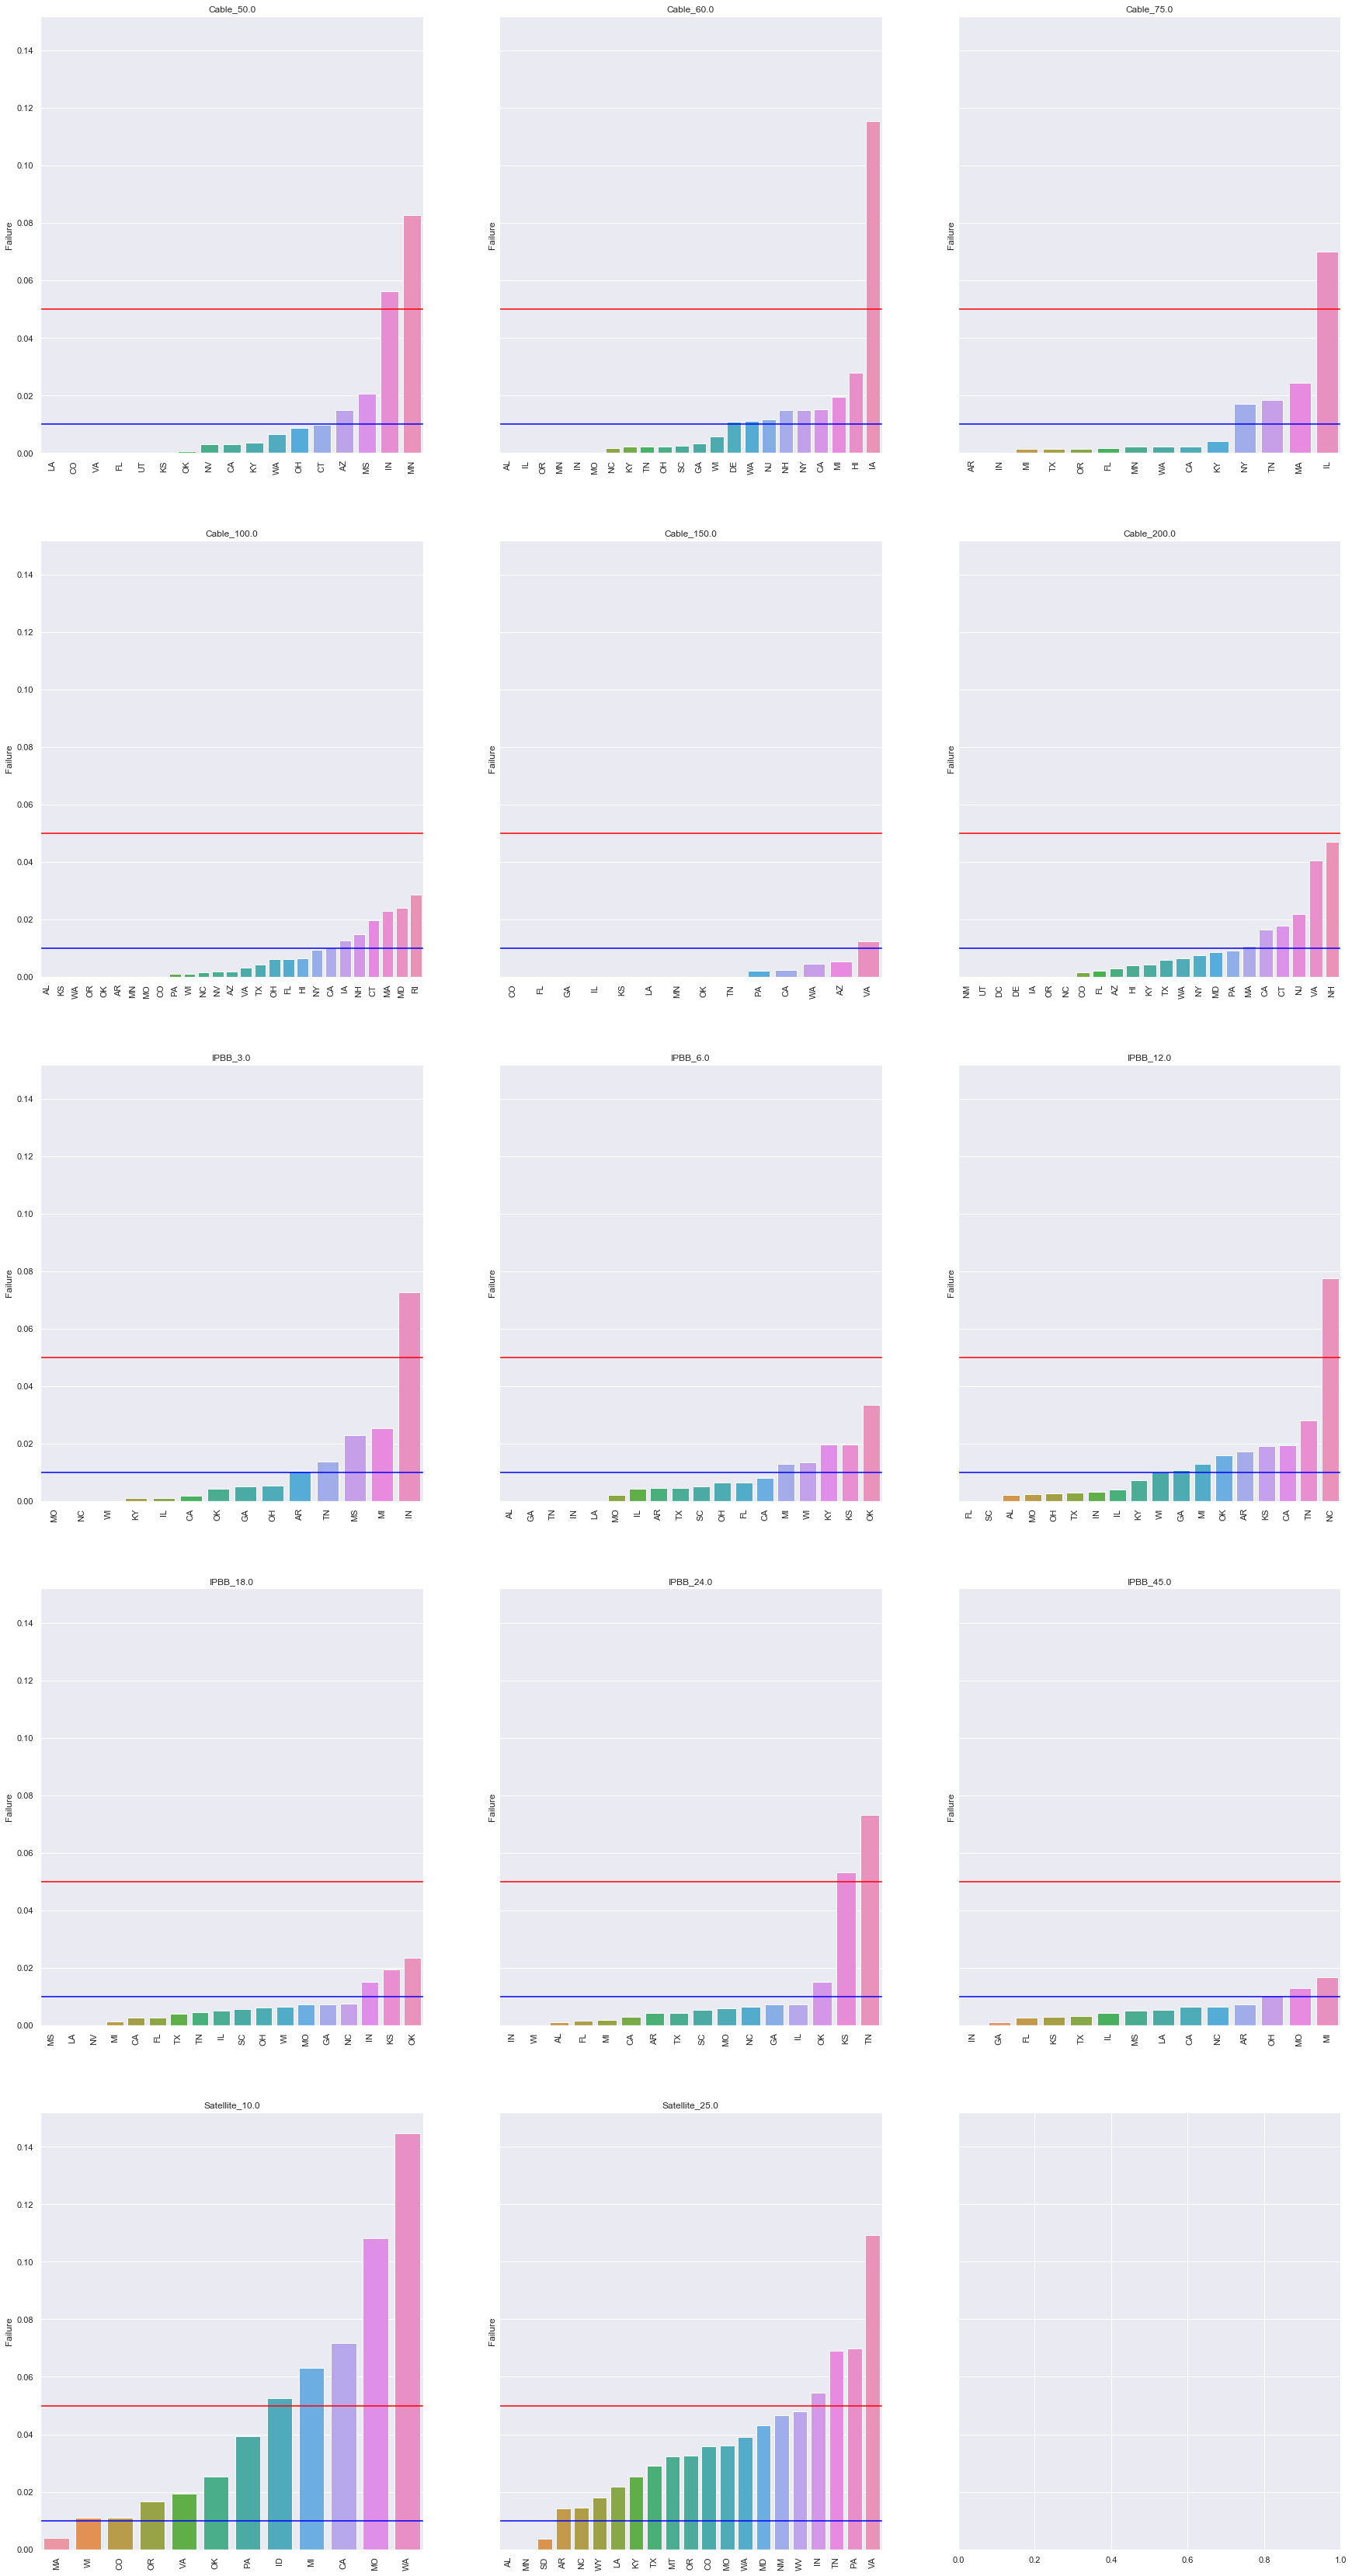

In [102]:
fig, ax = plt.subplots(int(len(select_group) / 3) + 1, 3, sharey = True, figsize=(30,60))

for i in range(len(select_group)):
    subset = getmt4_ava_state.loc[(getmt4_ava_state['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_ava_state['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Availability'], ascending = False, inplace = True)
    _ = sns.barplot(x='State',y='Failure', data=subset, ax=ax[int(i/3)][i % 3])
    _ = ax[int(i/3)][i % 3].set_xticklabels(ax[int(i/3)][i % 3].get_xticklabels(),rotation=90)
    _ = ax[int(i/3)][i % 3].axhline(0.01, ls='-', color = 'blue')
    _ = ax[int(i/3)][i % 3].axhline(0.05, ls='-', color = 'red')
    _ = ax[int(i/3)][i % 3].set_title('{}_{}'.format(select_group.loc[i, 'Technology'], select_group.loc[i, 'Download']))
    _ = ax[int(i/3)][i % 3].set_ylabel('Failure')
    _ = ax[int(i/3)][i % 3].set_xlabel('')

### Explore State Difference by Technology

In [66]:
# For each technology, select the best 5 states and worst 5 states. 

#### Cable

In [106]:
State_ava_best = []
State_ava_worst = []
for i in range(len(select_group)):
    if select_group.loc[i, 'Technology'] != 'Cable': 
        continue
    subset = getmt4_ava_state.loc[(getmt4_ava_state['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_ava_state['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Availability'], ascending = False, inplace = True)
    temp = np.array(subset['State'])
    State_ava_best.extend(temp[:5])
    State_ava_worst.extend(temp[-5:])

best_unique = list(set(State_ava_best))
worst_unique = list(set(State_ava_worst))

/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [107]:
# best
best_state = []
best_num = []
for i in range(len(best_unique)):
    best_state.append(best_unique[i])
    best_num.append(int(State_ava_best.count(best_unique[i])))


best_array = np.append(np.array(best_state).reshape(-1,1), np.array(best_num).reshape(-1,1), axis = 1)
best_df = pd.DataFrame(best_array, columns = ['State', 'Number'])
best_df.sort_values('Number', ascending = False, inplace = True)
best_df.reset_index(drop = True, inplace = True)
best_df

,State,Number
0,OR,3
1,AL,2
2,IN,2
3,KS,2
4,CO,2
5,FL,2
6,IL,2
7,UT,2
8,LA,1
9,MI,1


In [108]:
# worst
worst_state = []
worst_num = []
for i in range(len(worst_unique)):
    worst_state.append(worst_unique[i])
    worst_num.append(int(State_ava_worst.count(worst_unique[i])))


worst_array = np.append(np.array(worst_state).reshape(-1,1), np.array(worst_num).reshape(-1,1), axis = 1)
worst_df = pd.DataFrame(worst_array, columns = ['State', 'Number'])
worst_df.sort_values('Number', ascending = False, inplace = True)
worst_df.reset_index(drop = True, inplace = True)
worst_df

,State,Number
0,CA,3
1,CT,3
2,AZ,2
3,MA,2
4,NH,2
5,VA,2
6,NY,2
7,RI,1
8,IA,1
9,NJ,1


####   

#### IPBB

In [109]:
State_ava_best = []
State_ava_worst = []
for i in range(len(select_group)):
    if select_group.loc[i, 'Technology'] != 'IPBB': 
        continue
    subset = getmt4_ava_state.loc[(getmt4_ava_state['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_ava_state['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Availability'], ascending = False, inplace = True)
    temp = np.array(subset['State'])
    State_ava_best.extend(temp[:5])
    State_ava_worst.extend(temp[-5:])

best_unique = list(set(State_ava_best))
worst_unique = list(set(State_ava_worst))

/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [110]:
# best
best_state = []
best_num = []
for i in range(len(best_unique)):
    best_state.append(best_unique[i])
    best_num.append(int(State_ava_best.count(best_unique[i])))


best_array = np.append(np.array(best_state).reshape(-1,1), np.array(best_num).reshape(-1,1), axis = 1)
best_df = pd.DataFrame(best_array, columns = ['State', 'Number'])
best_df.sort_values('Number', ascending = False, inplace = True)
best_df.reset_index(drop = True, inplace = True)
best_df

,State,Number
0,FL,3
1,AL,3
2,IN,3
3,LA,2
4,MO,2
5,MI,2
6,GA,2
7,WI,2
8,SC,1
9,MS,1


In [111]:
# worst
worst_state = []
worst_num = []
for i in range(len(worst_unique)):
    worst_state.append(worst_unique[i])
    worst_num.append(int(State_ava_worst.count(worst_unique[i])))


worst_array = np.append(np.array(worst_state).reshape(-1,1), np.array(worst_num).reshape(-1,1), axis = 1)
worst_df = pd.DataFrame(worst_array, columns = ['State', 'Number'])
worst_df.sort_values('Number', ascending = False, inplace = True)
worst_df.reset_index(drop = True, inplace = True)
worst_df

,State,Number
0,KS,4
1,AR,3
2,MI,3
3,NC,3
4,TN,3
5,OK,3
6,GA,2
7,IN,2
8,KY,1
9,MS,1


####  

### by census

In [60]:
getmt4_ava_census = getmt_ava_bynode.loc[getmt_ava_bynode['threads'] == 8, ['Technology', 'Download','Census', 'Availability_IPV4']]
getmt4_ava_census['Census'] = getmt4_ava_census.apply(lambda row: row.Census.upper(), axis=1)

# download to float type
getmt4_ava_census['Download'] = getmt4_ava_census['Download'].astype(float)

getmt4_ava_census = getmt4_ava_census.groupby(['Technology', 'Download', 'Census']).agg(['count', 'mean'])
getmt4_ava_census.reset_index(['Technology', 'Download', 'Census'], inplace = True)
getmt4_ava_census.columns = ['Technology', 'Download', 'Census', 'count', 'Availability']
getmt4_ava_census['Failure'] = 1 - getmt4_ava_census['Availability']
getmt4_ava_census

,Technology,Download,Census,count,Availability,Failure
0,Cable,20.0,MIDWEST,2,0.996725,0.003275
1,Cable,20.0,NORTHEAST,2,0.983675,0.016325
2,Cable,20.0,SOUTH,2,0.998925,0.001075
3,Cable,25.0,MIDWEST,1,1.000000,0.000000
4,Cable,25.0,NORTHEAST,6,0.981877,0.018123
5,Cable,25.0,SOUTH,4,0.999464,0.000536
6,Cable,30.0,MIDWEST,2,0.998208,0.001792
7,Cable,30.0,NORTHEAST,1,0.982796,0.017204
8,Cable,30.0,SOUTH,5,0.998695,0.001305
9,Cable,40.0,MIDWEST,1,0.997849,0.002151


In [61]:
getmt4_ava_census['Census'].unique()

array(['MIDWEST', 'NORTHEAST', 'SOUTH', 'WEST'], dtype=object)

In [62]:
# select the (Tech, Download) group has at least three census
select_group = getmt4_ava_census[['Technology', 'Download', 'Census']].groupby(['Technology', 'Download'])\
                    .agg(['count'])
select_group.reset_index(['Technology', 'Download'], inplace = True)
select_group.columns = ['Technology', 'Download', 'count']
select_group = select_group.loc[select_group['count'] >= 3]
select_group.reset_index(drop = True, inplace = True)
select_group

,Technology,Download,count
0,Cable,20.0,3
1,Cable,25.0,3
2,Cable,30.0,3
3,Cable,50.0,4
4,Cable,60.0,4
5,Cable,75.0,4
6,Cable,100.0,4
7,Cable,105.0,4
8,Cable,150.0,4
9,Cable,200.0,4


/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/panzichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7:

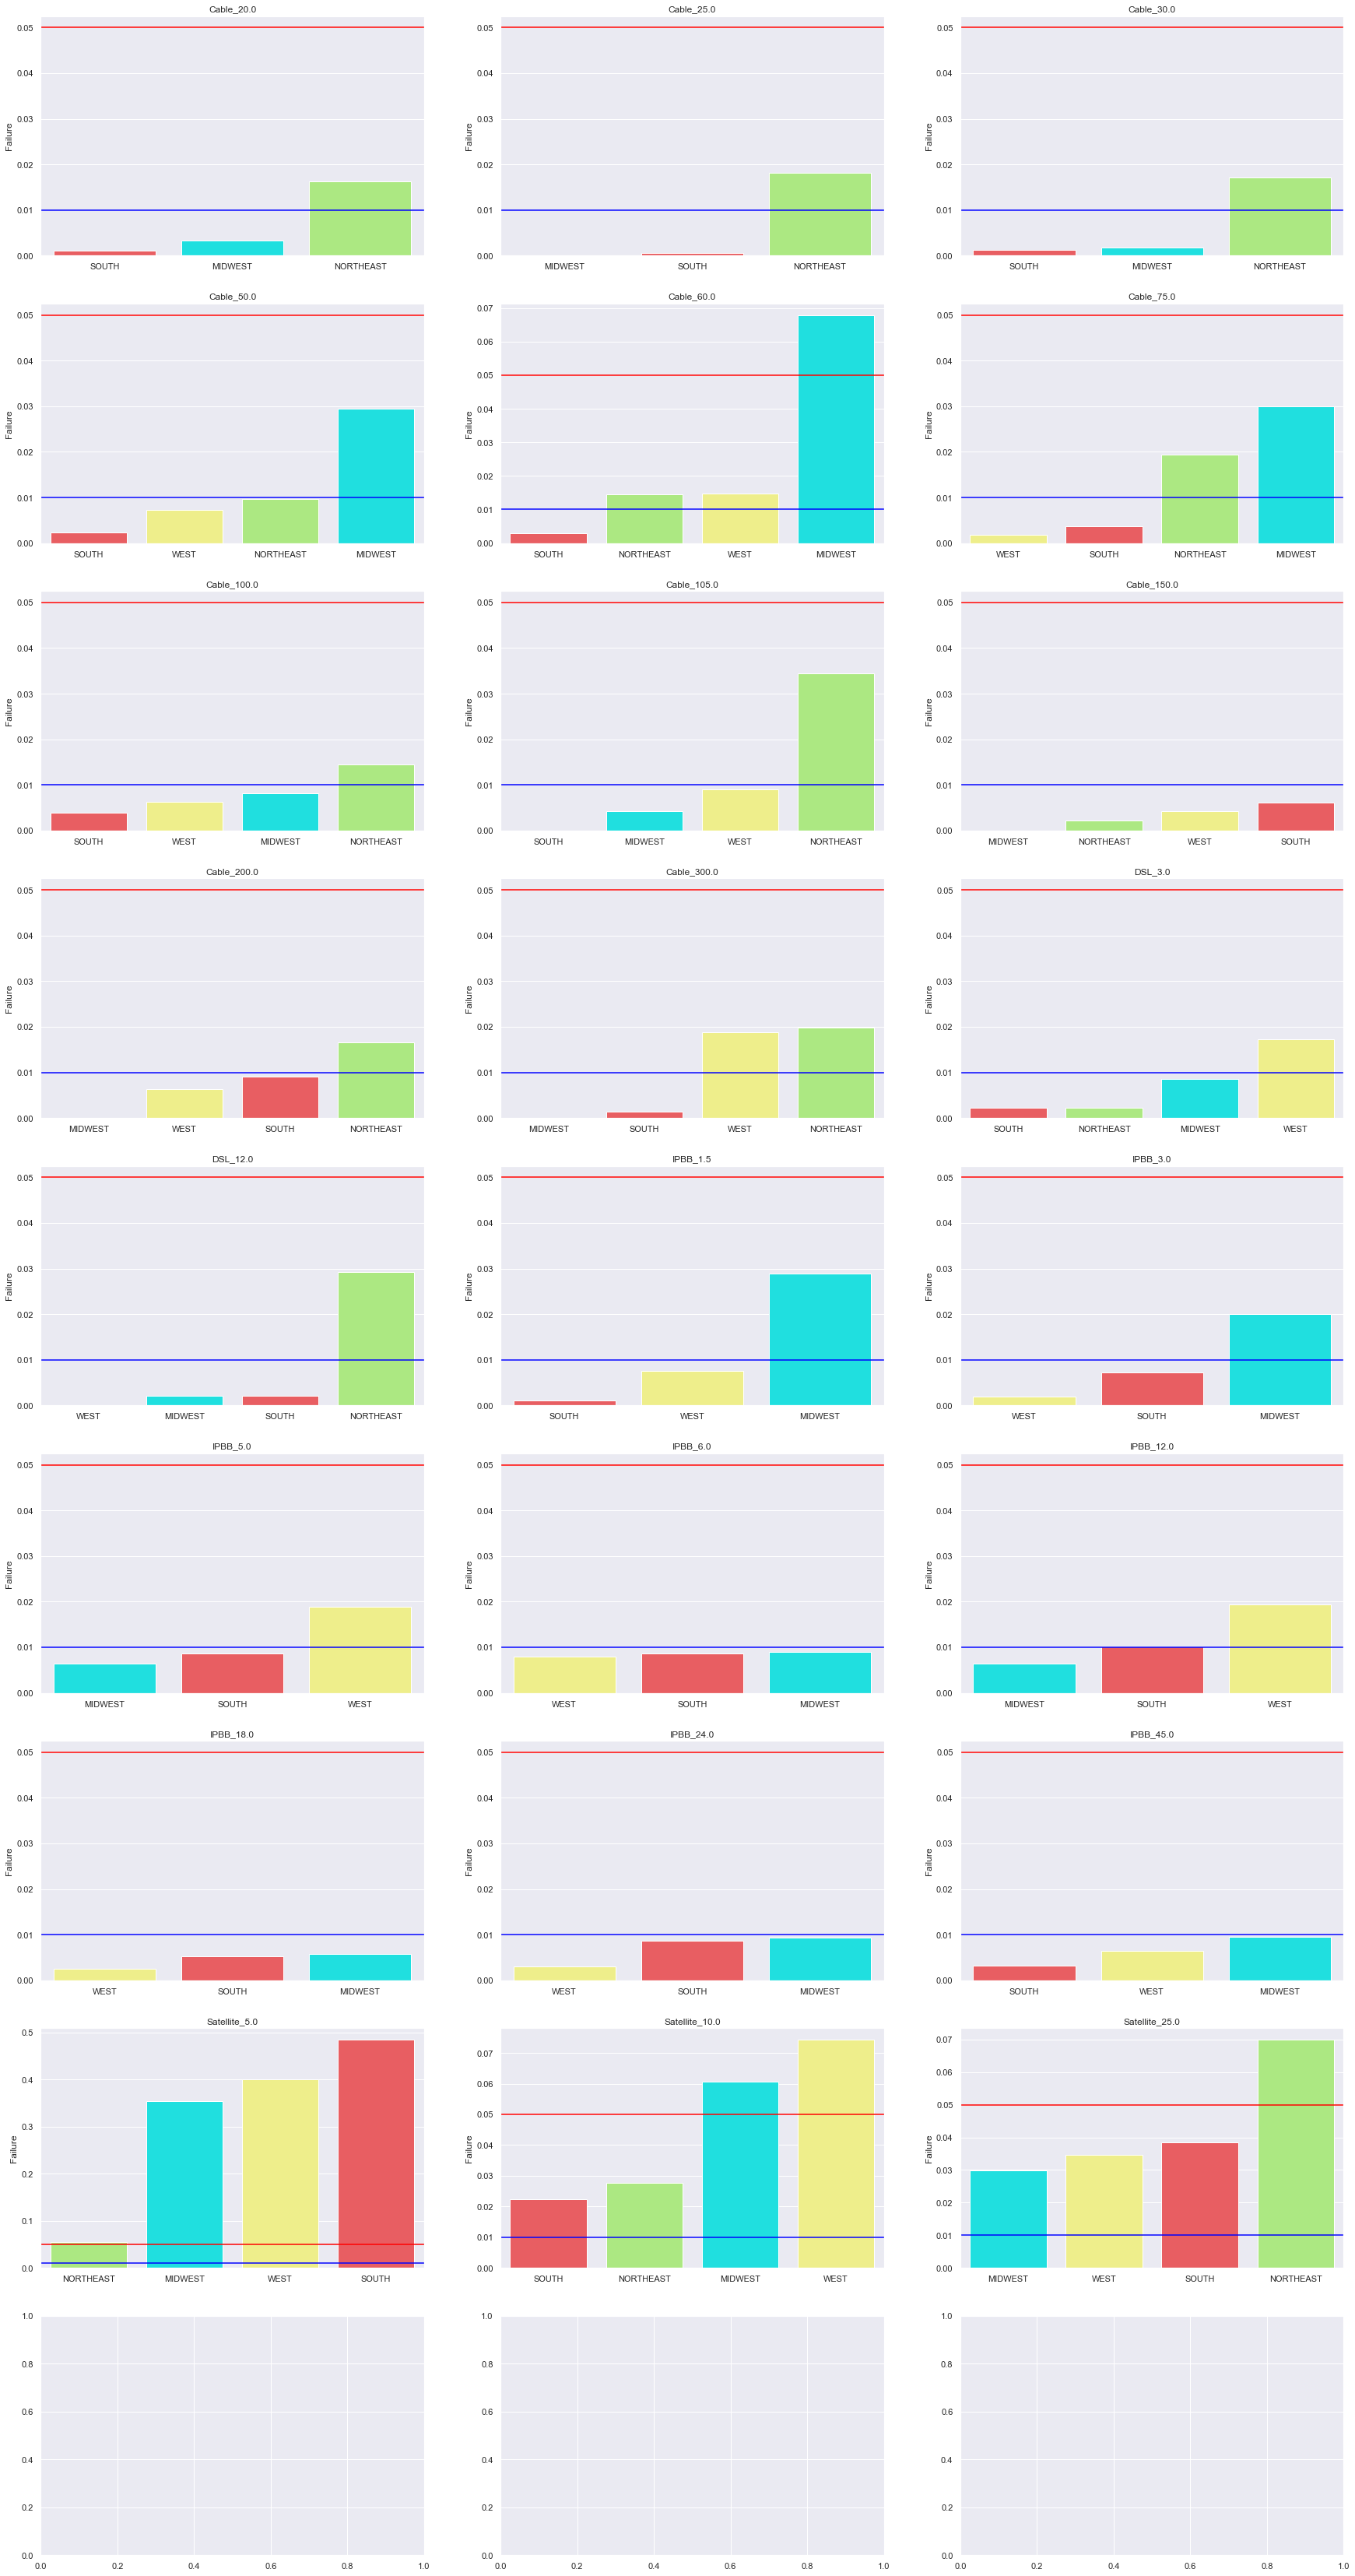

In [65]:
fig, ax = plt.subplots(int(len(select_group) / 3) + 1, 3, figsize=(30,60))
palette ={'NORTHEAST':'#a9f971','MIDWEST':'#00ffff', 'SOUTH':'#ff474c', 'WEST':'#fffe7a'}

for i in range(len(select_group)):
    subset = getmt4_ava_census.loc[(getmt4_ava_census['Technology'] == select_group.loc[i, 'Technology']) & \
                              (getmt4_ava_census['Download'] == select_group.loc[i, 'Download'])]
    subset.sort_values(by = ['Availability'], ascending = False, inplace = True)
    _ = sns.barplot(x='Census',y='Failure',palette=palette, \
                    data=subset, ax=ax[int(i/3)][i % 3])
    _ = ax[int(i/3)][i % 3].axhline(0.01, ls='-', color = 'blue')
    _ = ax[int(i/3)][i % 3].axhline(0.05, ls='-', color = 'red')
    _ = ax[int(i/3)][i % 3].set_title('{}_{}'.format(select_group.loc[i, 'Technology'], select_group.loc[i, 'Download']))
    _ = ax[int(i/3)][i % 3].set_ylabel('Failure')
    _ = ax[int(i/3)][i % 3].set_xlabel('')